# PATIENT DATASET
Using the above dataset to do survival analyis and find the survival curve

## BUSINESS OBJECTIVE
* Maximize Accuracy
* Minimize Errors

## CONSTRAINTS
* Negligience


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                                                                                          | **Type** | **Relevance** |
|:--------:|:-------------------|:--------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | PatientID | Identification of the following patient | Nominal    | Irrelevant     |
| 2 | Followup | Time followup of post-hospitalization or post traumatic survillience| Binary    | Relevant      |
| 3 | Eventtype | Events after a patient's death whether the patient is alive or not (0=Alive,1=death) | Binary | Relevant  |
| 4 | Scenario  | Review of a patient | Nominal| Irrelevant     |


Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
import lifelines

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass27\Patient.csv")
df=df0.copy()
df.head()

,PatientID,Followup,Eventtype,Scenario
0,John,1.0,1,A
1,Jess,2.0,1,A
2,Ann,3.0,0,A
3,Mary,4.0,0,A
4,Frank,5.0,1,A


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(10, 4)

In [4]:
df.dtypes

PatientID     object
Followup     float64
Eventtype      int64
Scenario      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  10 non-null     object 
 1   Followup   10 non-null     float64
 2   Eventtype  10 non-null     int64  
 3   Scenario   10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 448.0+ bytes


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Followup,Eventtype
count,10.000000,10.000000
mean,5.420000,0.600000
std,2.993994,0.516398
min,1.000000,0.000000
25%,3.250000,0.000000
50%,5.500000,1.000000
75%,7.550000,1.000000
max,10.000000,1.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 PatientID    0
Followup     0
Eventtype    0
Scenario     0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 PatientID    10
Followup     10
Eventtype     2
Scenario      1
dtype: int64


Droping the columns which has just one value throughout. 

In [10]:
df.drop(['Scenario'],axis=1,inplace=True)
df.head()

,PatientID,Followup,Eventtype
0,John,1.0,1
1,Jess,2.0,1
2,Ann,3.0,0
3,Mary,4.0,0
4,Frank,5.0,1


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [11]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13100\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Followup     5.42
Eventtype    0.60
dtype: float64

In [12]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13100\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Followup     5.5
Eventtype    1.0
dtype: float64

In [13]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_13100\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_13100\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([['John', 1.0, 1]], dtype=object), count=array([[1, 1, 6]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [14]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13100\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Followup     8.964000
Eventtype    0.266667
dtype: float64

In [15]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13100\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Followup     2.993994
Eventtype    0.516398
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [16]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13100\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Followup     0.084536
Eventtype   -0.484123
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [17]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_13100\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Followup    -1.063759
Eventtype   -2.276786
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

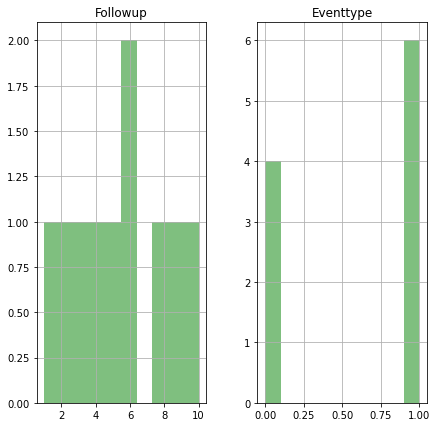

In [18]:
df.hist(alpha=0.5, figsize=(7, 7), color='green')
plt.show()

Plotting the pairplots. 

<Figure size 432x288 with 0 Axes>

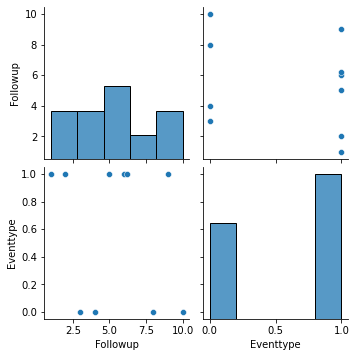

In [19]:
plt.figure()
sns.pairplot(df)
plt.show()

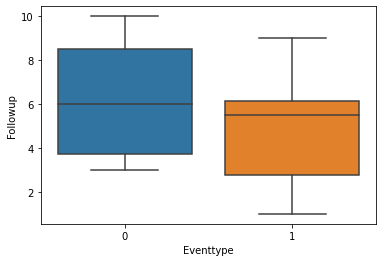

In [20]:
sns.boxplot(x='Eventtype', y='Followup', data=df)
plt.show()

The variable Followup refers to the time and assigned to 'T' while the Eventtype variable is the event and assigned to 'E'

In [21]:
T = df.Followup
E = df.Eventtype

### MODEL BUILDING

__Survival Analysis__

The survival analysis is based on the probability that the event of interest has not occurred at time t. A Survival function(Event) depending on time S(t) is generally used to represent that probability.

S(t)=P(T>t)

In other words, S(t) corresponds to the probability of survival after time t . Here, T corresponds to the random lifetime taken from the population. Note that S(t) is between zero and one (inclusive), and S(t) is a decreasing function of t .

Importing the KaplanMeierFitter model to fit the survival analysis

In [22]:
from lifelines import KaplanMeierFitter

Initiating the KaplanMeierFitter model

In [23]:
kmf = KaplanMeierFitter()

Fitting KaplanMeierFitter model on Time and Events for death 

In [24]:
kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10 total observations, 4 right-censored observations>

Time-line estimations plot 

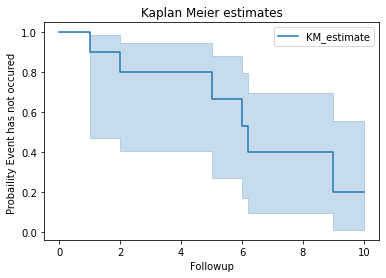

In [25]:
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("Followup")
plt.ylabel("Probaility Event has not occured ")
plt.show()

From the above time-line plot we can understand that the chances of the event not occuring is very high initially but after 6.2 followups the chances of event occuring is more as seen above.

In [26]:
print("The median survival time :",kmf.median_survival_time_)

The median survival time : 6.2


Given below is the KM_estimate that gives the probability of event not happening after the followup.

In [27]:
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
1.0          0.900000
2.0          0.800000
3.0          0.800000
4.0          0.800000
5.0          0.666667
6.0          0.533333
6.2          0.400000
8.0          0.400000
9.0          0.200000
10.0         0.200000


### CONCLUSION

The survival analysis helped us to determine distributions given the Kaplan survival plots. 